# CUADERNO REPORTE DE JORNADAS

## HEATMAPS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer.pitch import VerticalPitch
import ipywidgets as widgets
from IPython.display import display, clear_output

# Preparar el pitch
pitch = VerticalPitch(pitch_type='opta', pitch_color='grass', line_color='white')

# Diccionario con los nombres de las jornadas
nombres_jornadas = {
    "J1": "Jornada 1 - Local vs Universidad Cesar Vallejo",
    "J2": "Jornada 2 - Visita vs Alianza Atlético de Sullana",
    "J3": "Jornada 3 - Local vs Universitario de Deportes",
    "J4": "Jornada 4 - Visita vs Unión Comercio",
    "J5": "Jornada 5 - Local vs Comerciantes Unidos",
}

# Función para cargar los DataFrames de posiciones medias y heatmaps para todas las jornadas
def cargar_datos():
    df_posiciones_medias_total = pd.DataFrame()
    heatmaps_total = {}
    for jornada, nombre_jornada in nombres_jornadas.items():
        try:
            # Cargar el DataFrame de posiciones medias y agregar una columna 'Jornada'
            df_temp = pd.read_csv(f'CSV obtenidos\\{nombre_jornada}_posicion_jugadores.csv')
            df_temp['Jornada'] = jornada  # Añadir columna 'Jornada' con el identificador de la jornada
            df_posiciones_medias_total = pd.concat([df_posiciones_medias_total, df_temp])
            heatmaps_total[jornada] = f'CSV obtenidos\\{jornada}_heatmaps_jugadores.xlsx'
        except FileNotFoundError:
            print(f"No se encontró el archivo para {nombre_jornada}")
    return df_posiciones_medias_total, heatmaps_total

df_posiciones_medias, heatmaps = cargar_datos()

# Función modificada para dibujar los heatmaps y la posición media de un jugador seleccionado en todas las jornadas
def draw_player_heatmaps(jugador):
    clear_output(wait=True)
    num_jornadas = len(heatmaps)
    cols = 2
    rows = -(-num_jornadas // cols)  # Redondeo hacia arriba
    
    fig, axs = plt.subplots(rows, cols, figsize=(10 * cols, 7 * rows))
    fig.subplots_adjust(hspace=0.5, wspace=0.2)
    axs = axs.flatten()
    plot_counter = 0 
    for (jornada, archivo_excel) in (heatmaps.items()):
        with pd.ExcelFile(archivo_excel) as xls:
            if jugador in xls.sheet_names:
                df_heatmap = pd.read_excel(xls, sheet_name=jugador)
                if not df_heatmap.empty :
                    ax = axs[plot_counter]
                    pitch.draw(ax=ax)
                    pitch.kdeplot(df_heatmap['x'], df_heatmap['y'], ax=ax, levels=100, cmap='Blues', fill=True, shade_lowest=True, alpha=0.5)
                
                    fila_jugador = df_posiciones_medias[(df_posiciones_medias['name'] == jugador) & (df_posiciones_medias['Jornada'] == jornada)]
                    if not fila_jugador.empty:
                        pitch.scatter(fila_jugador['averageX'], fila_jugador['averageY'], ax=ax, s=200, color='blue', edgecolors='black', linewidth=2.5, zorder=1)
                        ax.text(fila_jugador['averageY'].values[0], fila_jugador['averageX'].values[0], fila_jugador['jerseyNumber'].values[0], color='white', ha='center', va='center', fontsize=12, zorder=2)
                        ax.set_title(f"{jugador} - {nombres_jornadas[jornada]}", fontsize=14)
                    plot_counter += 1  # Incrementar contador solo si se dibujó el subplot
                
                
    for j in range(plot_counter, rows * cols):
        axs[j].axis('off')
    
    plt.tight_layout()
    plt.show()


# Crear un widget de dropdown para seleccionar el jugador
jugador_selector = widgets.Dropdown(description='Jugador:')
jugador_selector.options = df_posiciones_medias['name'].unique()

# Widget de salida para los gráficos
output = widgets.Output()

# Función para manejar la selección de jugador
@output.capture(clear_output=True)
def update_heatmaps(change):
    draw_player_heatmaps(change['new'])

# Vincular cambios en el widget a la función
jugador_selector.observe(update_heatmaps, names='value')

# Mostrar el widget y output
display(jugador_selector)
display(output)


Dropdown(description='Jugador:', options=('Jesús Castillo', 'Renzo Garces', 'Cecilio Waterman', 'Franco Zanela…

Output()

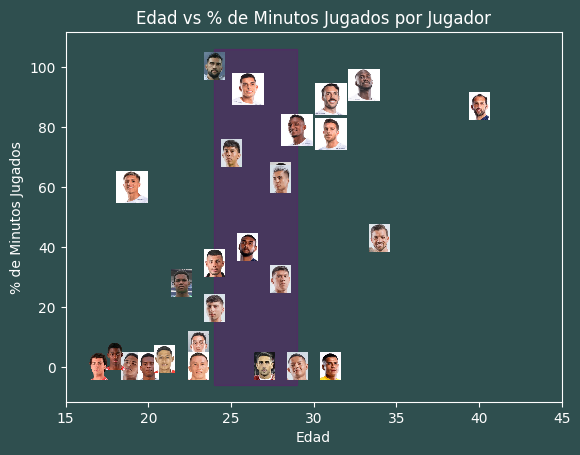

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
colores_posicion = {
    'Portero': 'red',
    'Defensa': 'blue',
    'Mediocampista': 'green',
    'Delantero': 'yellow'
}
# Leer el archivo xlsx
df = pd.read_excel('ALIANZA LIMA 2024.xlsx')
cantidad_jornadas_jugadas = 6  # Actualizar

minutos_columns = [col for col in df.columns if ' - Minutos' in col]
for col in minutos_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df[minutos_columns] = df[minutos_columns].fillna(0)

df=df.sort_values(by='Dorsal')
df['Total Minutos'] = df[minutos_columns].sum(axis=1)

total_minutos_posibles = 90 * cantidad_jornadas_jugadas
df['Porcentaje Minutos Jugados'] = (df['Total Minutos'] / total_minutos_posibles) * 100

norm = mcolors.Normalize(vmin=df['Porcentaje Minutos Jugados'].min(), vmax=df['Porcentaje Minutos Jugados'].max())

fig, ax = plt.subplots()
# Definir el colormap
cmap = plt.get_cmap('gist_rainbow')

# Normalizar los datos de porcentaje de minutos jugados para usar en el colormap
norm = mcolors.Normalize(vmin=df['Porcentaje Minutos Jugados'].min(), vmax=df['Porcentaje Minutos Jugados'].max())

for i, row in df.iterrows():
    color = colores_posicion[row['Posición']]  # Usar el color según la posición
    path_to_image = f'Imagenes/Jugadores/{row["Jugador"]}.png'
    image = plt.imread(path_to_image)
    imagebox = OffsetImage(image, zoom=0.15)
    ab = AnnotationBbox(imagebox, (row['Edad 2024'], row['Porcentaje Minutos Jugados']), frameon=False)
    ax.add_artist(ab)
    ax.scatter(row['Edad 2024'], row['Porcentaje Minutos Jugados'], color=color, label=row['Posición'], alpha=0.6)

ax.set_xlabel('Edad')
ax.set_ylabel('% de Minutos Jugados')
ax.set_title('Edad vs % de Minutos Jugados por Jugador')
ax.set_facecolor('darkslategray')
fig.patch.set_facecolor('darkslategray')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.fill([24, 29, 29, 24], [-6, -6, 106, 106], color='purple',
        alpha=0.3, zorder=2)

# Establecer los límites del eje x
ax.set_xlim(15, 45)
    
# Antes de plt.show(), agrega la siguiente línea:
plt.savefig(f'Resultados PNG/grafico_edad_vs_minutos_jugados_hasta_j6.png', dpi=300, bbox_inches='tight', facecolor=fig.get_facecolor())
plt.show()


 # Manejo de informacion por jornada

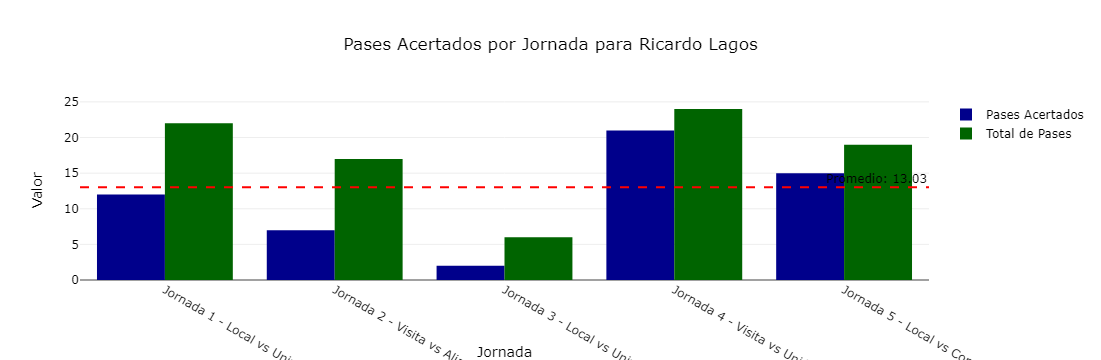

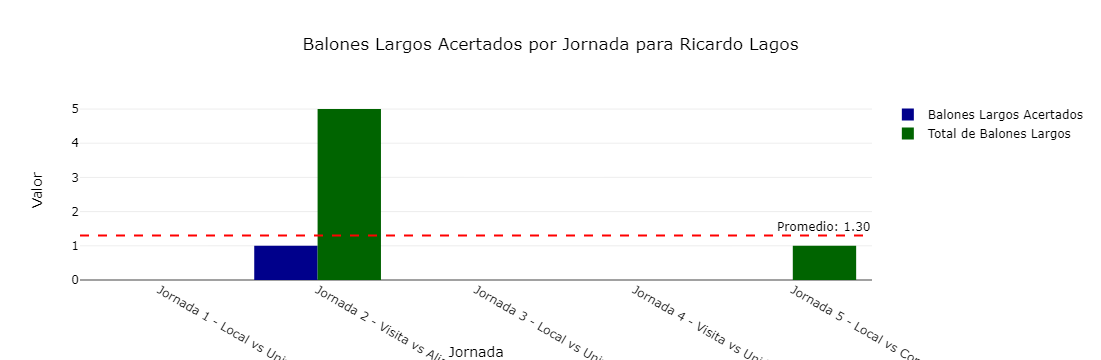

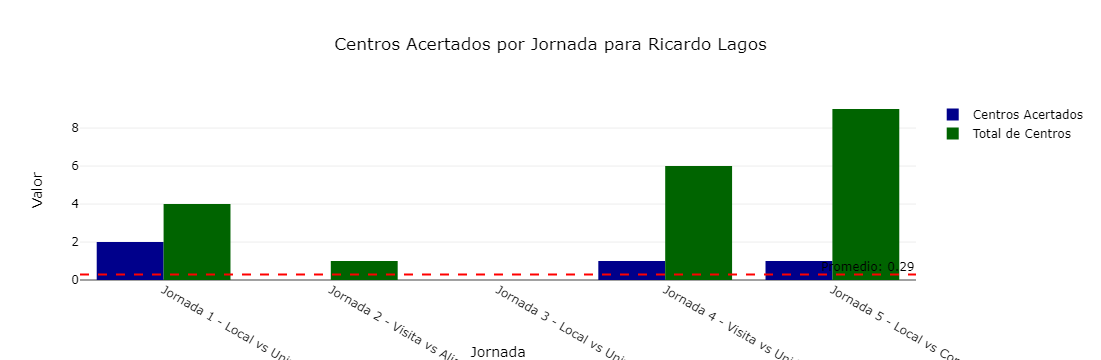

In [11]:
import seaborn as sns
import numpy as np
import streamlit as st
import pandas as pd
import plotly.graph_objects as go

# Carga de datos
df = pd.read_excel(r'C:\Users\Alvaro\Proyectos\Proyecto Gronestats\GroneStats\XLSX finales\Resumen_AL_Jugadores.xlsx')

jugador_seleccionado = 'Ricardo Lagos'

# Filtrar datos por jugador seleccionado
df_jugador = df[df['Jugador'] == jugador_seleccionado].copy()

figs = []  # Lista para almacenar figuras de Plotly
estadisticas = ['Pases Acertados', 'Balones Largos Acertados', 'Centros Acertados']
totales = ['Total de Pases', 'Total de Balones Largos', 'Total de Centros'] # Ajusta con los nombres reales de tus columnas

for estadistica, total_estadistica in zip(estadisticas, totales):
    fig = go.Figure()

    # Cálculo del promedio para la estadística actual
    promedio = df[estadistica].mean()

    # Texto para el tooltip incluyendo el promedio
    hover_text = [f"{estadistica}: {val}<br>Intentados: {totales}" for val in df_jugador[estadistica]]

    # Texto para el tooltip para los totales (opcional, ajusta según necesidad)
    hover_text_totales = [f"{total_estadistica}: {val}<br>Promedio: {promedio:.2f}" for val in df_jugador[total_estadistica]]


    # Añadir gráfico de barras para la estadística
    fig.add_trace(go.Bar(x=df_jugador['Jornada'], y=df_jugador[estadistica],
                         name=estadistica, marker_color='darkblue'))
    
    # Añadir gráfico de barras para los totales
    fig.add_trace(go.Bar(x=df_jugador['Jornada'], y=df_jugador[total_estadistica],
                         name=total_estadistica, marker_color='darkgreen'))

    # Añadir línea de promedio
    fig.add_hline(y=promedio, line_dash="dash", line_color="red",
                  annotation_text=f"Promedio por cada 90 min: {promedio:.2f}",
                  annotation_position="top right")

    # Personalización adicional del gráfico
    fig.update_layout(title=f'{estadistica} por Jornada para {jugador_seleccionado}',
                      xaxis_title='Jornada',
                      yaxis_title='Valor',
                      plot_bgcolor='rgba(0,0,0,0)',
                      paper_bgcolor='rgba(0,0,0,0)',
                      font=dict(color='black'))

    figs.append(fig)

# Mostrar los gráficos
for fig in figs:
    fig.show()

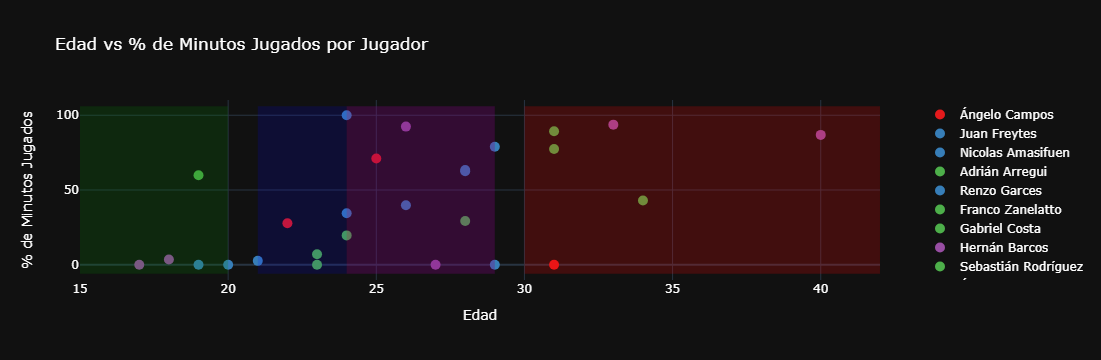

In [44]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Leer el archivo xlsx
df = pd.read_excel('ALIANZA LIMA 2024.xlsx')
cantidad_jornadas_jugadas = 6  # Actualizar

minutos_columns = [col for col in df.columns if ' - Minutos' in col]
for col in minutos_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df[minutos_columns] = df[minutos_columns].fillna(0)

df = df.sort_values(by='Dorsal')
df['Total Minutos'] = df[minutos_columns].sum(axis=1)

total_minutos_posibles = 90 * cantidad_jornadas_jugadas
df['Porcentaje Minutos Jugados'] = (df['Total Minutos'] / total_minutos_posibles) * 100

posiciones_unicas = df['Posición'].unique()
colores = px.colors.qualitative.Set1
mapeo_colores = {pos: colores[i % len(colores)] for i, pos in enumerate(posiciones_unicas)}

# Crear el gráfico de dispersión con Plotly
fig = go.Figure()

for i, row in df.iterrows():
    color = mapeo_colores[row['Posición']]
    # Truncar el porcentaje a dos decimales para el texto del hover
    porcentaje_truncado = f"{row['Porcentaje Minutos Jugados']:.2f}"  # Formatear a dos decimales
    fig.add_trace(go.Scatter(
        x=[row['Edad 2024']], 
        y=[row['Porcentaje Minutos Jugados']],
        mode='markers',
        marker=dict(size=10, color=color),
        hoverinfo='text',
        text=f"{row['Jugador']}: {porcentaje_truncado}%",  # Usar el valor truncado
        name=row['Jugador']))

# Actualizar el layout del gráfico para ajustar el tamaño
fig.update_layout(
    title='Edad vs % de Minutos Jugados por Jugador',
    xaxis_title='Edad',
    yaxis_title='% de Minutos Jugados',
    template = 'plotly_dark',
    font=dict(color='white'),
    legend=dict(x=1.05, y=1),
    xaxis=dict(range=[15, 42], color='white'),
    yaxis=dict(color='white'),
    height=600  # Ajustar según necesidad
)

# En azul los jugadores transitorios (mas de 30), en morado los de alta competencia (24 a 29), en rojo claro los jugadores jóvenes (de 21 a 23)
# En verde los potrillos (menos de 20)
# Jugadores transitorios (más de 30 años), en azul
fig.add_shape(type="rect", x0=30, y0=-6, x1=45, y1=106,
              line=dict(width=0), fillcolor="red", opacity=0.2)

# Jugadores de alta competencia (24 a 29 años), en morado
fig.add_shape(type="rect", x0=24, y0=-6, x1=29, y1=106,
              line=dict(width=0), fillcolor="purple", opacity=0.3)

# Jugadores jóvenes (21 a 24 años), en rojo claro
fig.add_shape(type="rect", x0=21, y0=-6, x1=24, y1=106,
              line=dict(width=0), fillcolor="blue", opacity=0.15)

# Potrillos (menos de 20 años), en verde
fig.add_shape(type="rect", x0=15, y0=-6, x1=20, y1=106,
              line=dict(width=0), fillcolor="green", opacity=0.2)

fig.show()

